# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from datetime import datetime


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
url

'http://api.openweathermap.org/data/2.5/weather?'

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&units=metric" + "&q=" + city
         
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lerwick
Processing Record 2 of Set 1 | inarajan village
Processing Record 3 of Set 1 | kingston
Processing Record 4 of Set 1 | hawaiian paradise park
Processing Record 5 of Set 1 | udachny
Processing Record 6 of Set 1 | iqaluit
Processing Record 7 of Set 1 | al bawiti
Processing Record 8 of Set 1 | alofi
Processing Record 9 of Set 1 | port mathurin
Processing Record 10 of Set 1 | taman rajawali
City not found. Skipping...
Processing Record 11 of Set 1 | utrik
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | eastham
Processing Record 14 of Set 1 | adamstown
Processing Record 15 of Set 1 | hepo
Processing Record 16 of Set 1 | grytviken
Processing Record 17 of Set 1 | opuwo
Processing Record 18 of Set 1 | labytnangi
Processing Record 19 of Set 1 | kargil
Processing Record 20 of Set 1 | richards bay
Processing Record 21 of Set 1 | blackmans bay
Processing Record 22 of

Processing Record 37 of Set 4 | sola
Processing Record 38 of Set 4 | eyl
Processing Record 39 of Set 4 | zavitinsk
Processing Record 40 of Set 4 | banamba
Processing Record 41 of Set 4 | bamboo flat
Processing Record 42 of Set 4 | carauari
Processing Record 43 of Set 4 | bengkulu
Processing Record 44 of Set 4 | zakynthos
Processing Record 45 of Set 4 | manokwari
Processing Record 46 of Set 4 | bardai
Processing Record 47 of Set 4 | lata
Processing Record 48 of Set 4 | karratha
Processing Record 49 of Set 4 | pacific grove
Processing Record 0 of Set 5 | la passe
Processing Record 1 of Set 5 | tommot
Processing Record 2 of Set 5 | vilyuysk
Processing Record 3 of Set 5 | lensk
Processing Record 4 of Set 5 | dryden
Processing Record 5 of Set 5 | flying fish cove
Processing Record 6 of Set 5 | dudinka
Processing Record 7 of Set 5 | mandalgovi
Processing Record 8 of Set 5 | nurota
Processing Record 9 of Set 5 | laurel
Processing Record 10 of Set 5 | pervari
Processing Record 11 of Set 5 | fo

Processing Record 28 of Set 8 | klyuchi
Processing Record 29 of Set 8 | santa elena de uairen
Processing Record 30 of Set 8 | franklin
Processing Record 31 of Set 8 | tsiombe
Processing Record 32 of Set 8 | port pirie
Processing Record 33 of Set 8 | medina
Processing Record 34 of Set 8 | oxapampa
Processing Record 35 of Set 8 | saudarkrokur
Processing Record 36 of Set 8 | shingu
Processing Record 37 of Set 8 | iquique
Processing Record 38 of Set 8 | borogontsy
Processing Record 39 of Set 8 | bocas del toro
Processing Record 40 of Set 8 | jose bonifacio
Processing Record 41 of Set 8 | aban
Processing Record 42 of Set 8 | la sarre
Processing Record 43 of Set 8 | harper
Processing Record 44 of Set 8 | jardim
Processing Record 45 of Set 8 | krasnoarmeysk
Processing Record 46 of Set 8 | santa terezinha
Processing Record 47 of Set 8 | atafu village
Processing Record 48 of Set 8 | east london
Processing Record 49 of Set 8 | lamu
Processing Record 0 of Set 9 | marolambo
Processing Record 1 of 

Processing Record 16 of Set 12 | cody
Processing Record 17 of Set 12 | manta
Processing Record 18 of Set 12 | dong ha
Processing Record 19 of Set 12 | cooper's town
Processing Record 20 of Set 12 | khasab
Processing Record 21 of Set 12 | tazacorte
Processing Record 22 of Set 12 | la'ie
Processing Record 23 of Set 12 | batticaloa
Processing Record 24 of Set 12 | luena
Processing Record 25 of Set 12 | luwuk
Processing Record 26 of Set 12 | oban
Processing Record 27 of Set 12 | ulsteinvik
Processing Record 28 of Set 12 | coari
Processing Record 29 of Set 12 | gazli
Processing Record 30 of Set 12 | whakatane
Processing Record 31 of Set 12 | altamira
Processing Record 32 of Set 12 | kuanda
Processing Record 33 of Set 12 | leava
Processing Record 34 of Set 12 | lodja
Processing Record 35 of Set 12 | le vauclin
Processing Record 36 of Set 12 | gebeit
Processing Record 37 of Set 12 | challapata
Processing Record 38 of Set 12 | selfoss
Processing Record 39 of Set 12 | namdrik
Processing Record 

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df= pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lerwick,60.1545,-1.1494,15.00,95,100,5.34,GB,1688772554
1,inarajan village,13.2736,144.7484,29.54,79,92,7.03,GU,1688772554
2,kingston,17.9970,-76.7936,31.53,66,20,8.75,JM,1688772555
3,hawaiian paradise park,19.5933,-154.9731,25.73,83,75,1.54,US,1688772555
4,udachny,66.4167,112.4000,13.76,66,55,9.53,RU,1688772555


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lerwick,60.1545,-1.1494,15.00,95,100,5.34,GB,1688772554
1,inarajan village,13.2736,144.7484,29.54,79,92,7.03,GU,1688772554
2,kingston,17.9970,-76.7936,31.53,66,20,8.75,JM,1688772555
3,hawaiian paradise park,19.5933,-154.9731,25.73,83,75,1.54,US,1688772555
4,udachny,66.4167,112.4000,13.76,66,55,9.53,RU,1688772555


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [10]:
# Convert column "Date" into human-readible date format
city_data_df["Readible Date"] = city_data_df["Date"].apply(lambda x: datetime.utcfromtimestamp(int(x)).strftime('%Y-%m-%d'))
city_data_df["Readible Date"]

current_date = city_data_df["Readible Date"].unique()

# Convert the unique array to a Python list
date_list = current_date.tolist()

# Extract the date string
date = date_list[0]
date

'2023-07-07'

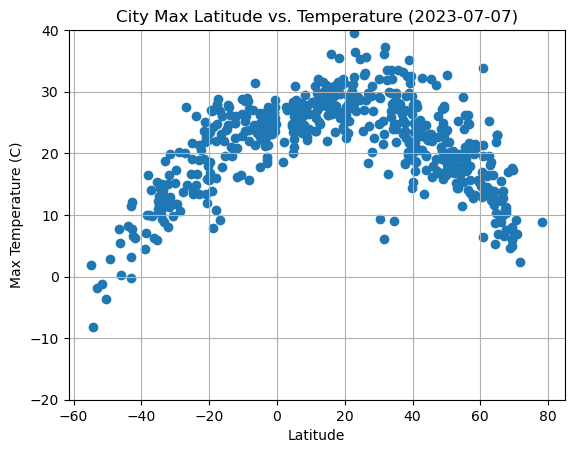

In [11]:
# Build scatter plot for latitude vs. temperature

xvalues = city_data_df["Lat"]
yvalues = city_data_df["Max Temp"]
plt.scatter(xvalues, yvalues, marker="o")

# Incorporate the other graph properties

plt.title(f"City Max Latitude vs. Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)
plt.ylim(-20, 40)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

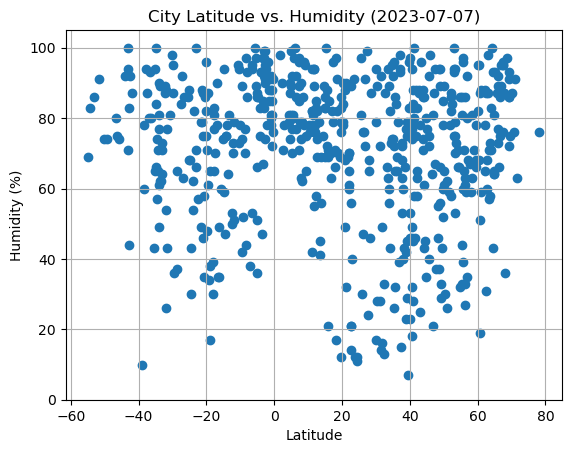

In [12]:
# Build the scatter plots for latitude vs. humidity

xvalues = city_data_df["Lat"]
yvalues = city_data_df["Humidity"]
plt.scatter(xvalues, yvalues, marker="o")


# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.ylim(0, 105)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

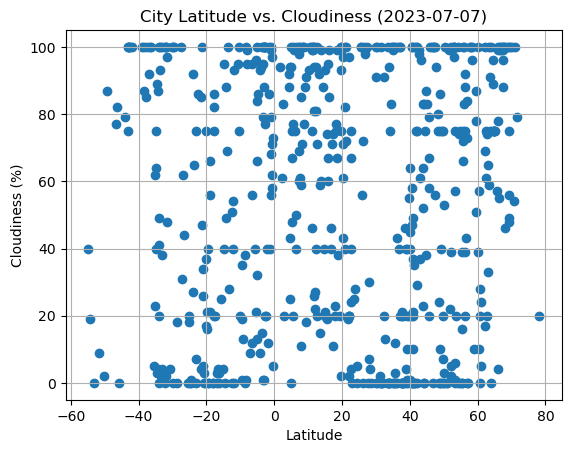

In [13]:
# Build the scatter plots for latitude vs. cloudiness

xvalues = city_data_df["Lat"]
yvalues = city_data_df["Cloudiness"]
plt.scatter(xvalues, yvalues, marker="o")



# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.ylim(-5, 105)


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

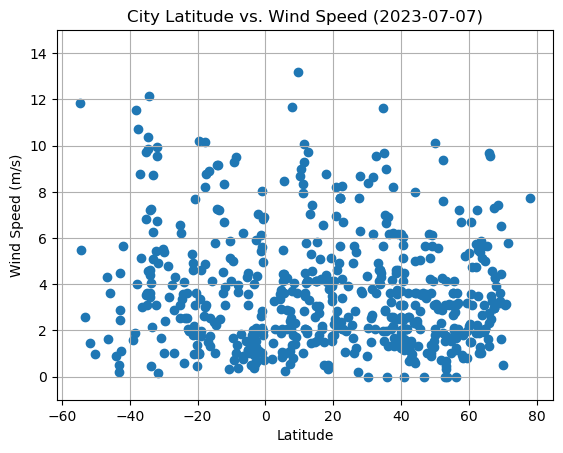

In [14]:
# Build the scatter plots for latitude vs. wind speed

xvalues = city_data_df["Lat"]
yvalues = city_data_df["Wind Speed"]
plt.scatter(xvalues, yvalues, marker="o")



# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)
plt.ylim(-1, 15)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [43]:
# Define a function to create Linear Regression plots


def linear_regression_plot(x_values,y_values,a,b):
    
    # Get slope, intercept, rvalue, pvalue, stderr values
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
        
    # Create Plot
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    
    # Label plot and annotate the line equation
    plt.xlabel("Latitude")
    plt.ylabel(y_values.name)
    plt.annotate(line_eq, (a,b) , fontsize=15, color="red")
    
    
    # Print r value
    print(f"The r-value is: {rvalue**2}")
    plt.show()
    
    

In [44]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Readible Date
City_ID,,,,,,,,,,
0,lerwick,60.1545,-1.1494,15.00,95,100,5.34,GB,1688772554,2023-07-07
1,inarajan village,13.2736,144.7484,29.54,79,92,7.03,GU,1688772554,2023-07-07
2,kingston,17.9970,-76.7936,31.53,66,20,8.75,JM,1688772555,2023-07-07
3,hawaiian paradise park,19.5933,-154.9731,25.73,83,75,1.54,US,1688772555,2023-07-07
4,udachny,66.4167,112.4000,13.76,66,55,9.53,RU,1688772555,2023-07-07


In [45]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Readible Date
City_ID,,,,,,,,,,
7,alofi,-19.0595,-169.9187,26.94,65,66,4.63,NU,1688772556,2023-07-07
8,port mathurin,-19.6833,63.4167,23.50,71,21,10.21,MU,1688772556,2023-07-07
10,port-aux-francais,-49.3500,70.2167,2.78,74,87,17.76,TF,1688772558,2023-07-07
12,adamstown,-25.0660,-130.1015,21.70,68,18,6.57,PN,1688772559,2023-07-07
14,grytviken,-54.2811,-36.5092,-8.21,83,19,5.48,GS,1688772559,2023-07-07


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.45088005236308676


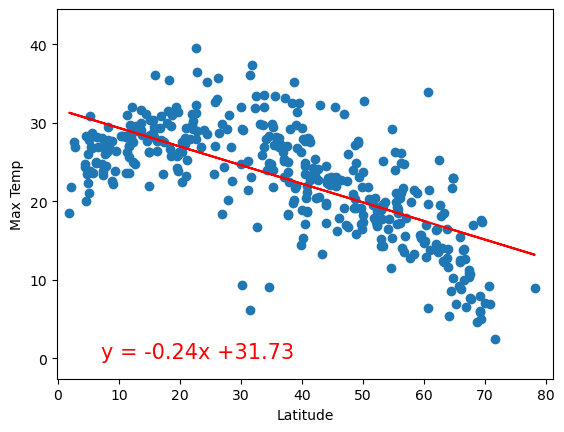

None


In [93]:
# Linear regression on Northern Hemisphere

# Define the variables
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
a = 7
b = 0

# Adjust the limits of x-axis and y-axis
plt.xlim(min(x_values)-2, max(x_values)+3)
plt.ylim(min(y_values)-5, max(y_values)+5)

# Print the result
result = linear_regression_plot(x_values, y_values,a,b)
print(result)



The r-value is: 0.7019297128988898


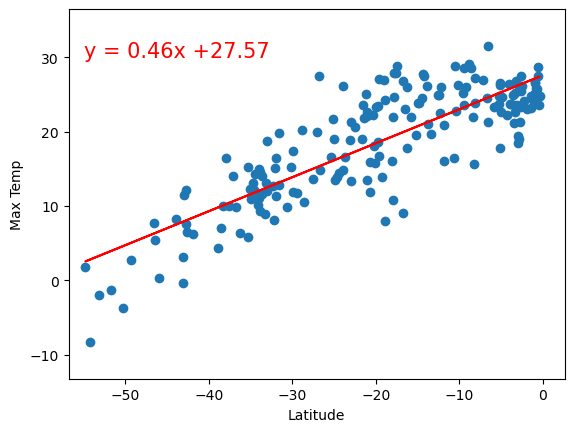

None


In [92]:
# Linear regression on Southern Hemisphere

# Define the variables
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
a = -55
b = 30

# Adjust the limits of x-axis and y-axis
plt.xlim(min(x_values)-2, max(x_values)+3)
plt.ylim(min(y_values)-5, max(y_values)+5)

# Print the result
result = linear_regression_plot(x_values, y_values,a,b)
print(result)



**Discussion about the linear relationship:** 

Northern Hemisphere
The r-value equals to 0.451 which means that there is a moderate correlation between latitude and max temperature. A negative slope (-0.24) means that as the latitude increases, the max temperature decreases.

Southern Hemisphere
The r-value equals to 0.702 which means that there is a strong correlation between latitude and max temperature. A positive slope (0.46) means that as the latitude increases, the max temperature increases too.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0016252455207088662


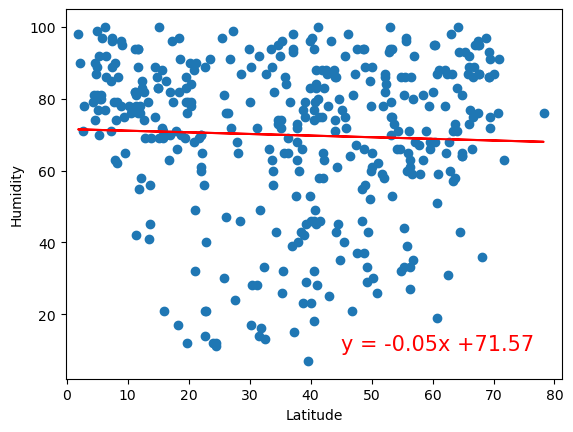

None


In [91]:
# Northern Hemisphere

# Define the variables
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
a = 45
b = 10

# Adjust the limits of x-axis and y-axis
plt.xlim(min(x_values)-2, max(x_values)+3)
plt.ylim(min(y_values)-5, max(y_values)+5)

# Print the result
result = linear_regression_plot(x_values, y_values,a,b)
print(result)


The r-value is: 0.01341972478322908


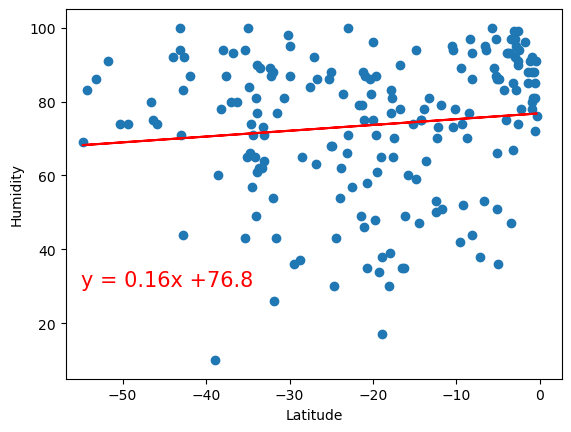

None


In [94]:
# Southern Hemisphere

# Define the variables
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
a = -55
b = 30

# Adjust the limits of x-axis and y-axis
plt.xlim(min(x_values)-2, max(x_values)+3)
plt.ylim(min(y_values)-5, max(y_values)+5)

# Print the result
result = linear_regression_plot(x_values, y_values,a,b)
print(result)



**Discussion about the linear relationship:**

Northern Hemisphere
The r-value equals to 0.002 which means that there is practically no correlation between latitude and humidity (according to our data, latitude is a poor predictor of humidity).
A negative slope (-0.05) means that for every 1-degree increase in latitude, humidity decreases by 0.05 units.

Southern Hemisphere
The r-value equals to 0.013 which means that there is practically no correlation between latitude and humidity (according to our data, latitude is a poor predictor of humidity). 
A positive slope (0.16) means that for every 1-degree increase in latitude, humidity increases by 0.16 units.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.000473872891474653


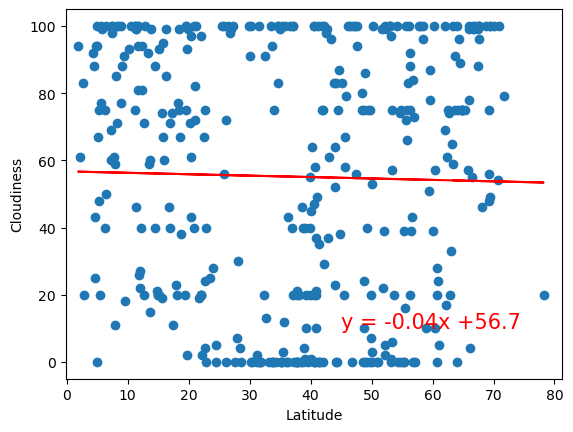

None


In [95]:
# Northern Hemisphere

# Define the variables
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
a = 45
b = 10

# Adjust the limits of x-axis and y-axis
plt.xlim(min(x_values)-2, max(x_values)+3)
plt.ylim(min(y_values)-5, max(y_values)+5)

# Print the result
result = linear_regression_plot(x_values, y_values,a,b)
print(result)

The r-value is: 0.0002070773647159999


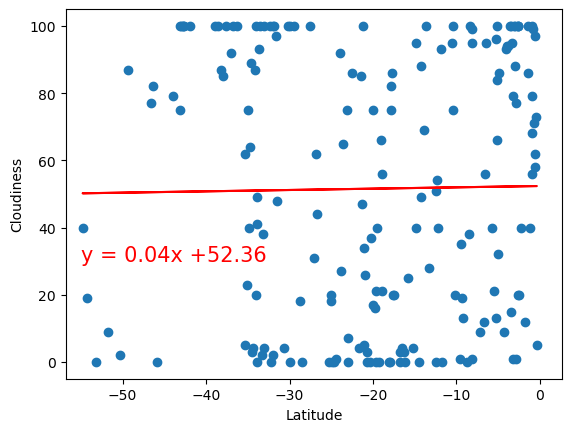

None


In [96]:
# Southern Hemisphere

# Define the variables
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
a = -55
b = 30

# Adjust the limits of x-axis and y-axis
plt.xlim(min(x_values)-2, max(x_values)+3)
plt.ylim(min(y_values)-5, max(y_values)+5)

# Print the result
result = linear_regression_plot(x_values, y_values,a,b)
print(result)


**Discussion about the linear relationship:** 

Northern Hemisphere
The r-value equals to 0.0005 which suggest an extremlely weak correlation between latitude and cloudiness (according to our data, latitude is not a reliable predictor of cloudiness).
A negative slope (-0.04) means that for every 1-degree increase in latitude, cloudiness decreases by 0.04 units.

Southern Hemisphere
The r-value equals to 0.0002 which suggest an extremlely weak correlation between latitude and cloudiness (according to our data, latitude is not a reliable predictor of cloudiness).
A positive slope (0.04) means that for every 1-degree increase in latitude, cloudiness increases by 0.04 units.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.005028870876606337


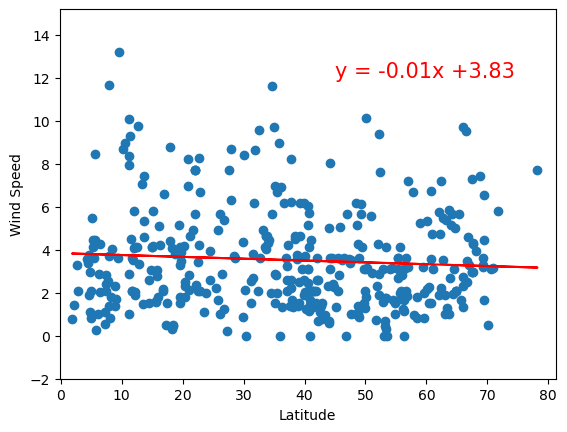

None


In [97]:
# Northern Hemisphere

# Define the variables
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
a = 45
b = 12

# Adjust the limits of x-axis and y-axis
plt.xlim(min(x_values)-2, max(x_values)+3)
plt.ylim(min(y_values)-2, max(y_values)+2)

# Print the result
result = linear_regression_plot(x_values, y_values,a,b)
print(result)

The r-value is: 0.057005560669873154


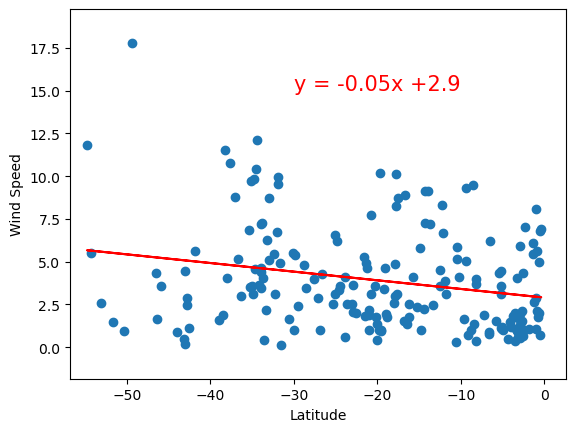

None


In [99]:
# Southern Hemisphere

# Define the variables
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
a = -30
b = 15

# Adjust the limits of x-axis and y-axis
plt.xlim(min(x_values)-2, max(x_values)+3)
plt.ylim(min(y_values)-2, max(y_values)+2)

# Print the result
result = linear_regression_plot(x_values, y_values,a,b)
print(result)


**Discussion about the linear relationship:** 
Northern Hemisphere
The r-value equals to 0.005 which suggest an extremlely weak correlation between latitude and wind speed (according to our data, latitude is not a reliable predictor of win speed).
A negative slope (-0.01) means that for every 1-degree increase in latitude, wind speed decreases by 0.01 units.

Southern Hemisphere
The r-value equals to 0.057 which suggest a very correlation between latitude and wind speed (according to our data, latitude is not a reliable predictor of win speed).
A negative slope (-0.05) means that for every 1-degree increase in latitude, wind speed decreases by 0.05 units.